In [1]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 

from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score, confusion_matrix 
  
%matplotlib inline

/home/priver/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv("Training.csv")
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [3]:
disease_counts = data["prognosis"].value_counts()
disease_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

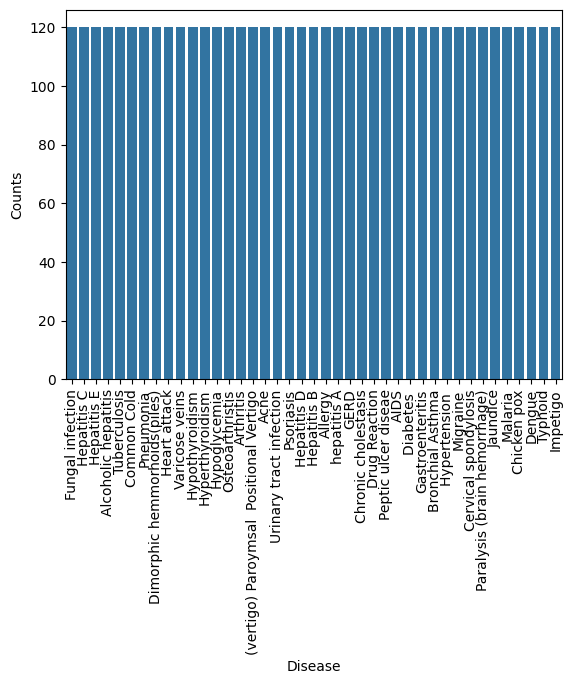

In [4]:
temp_df = pd.DataFrame({
    "Disease" : disease_counts.index,
    "Counts" : disease_counts.values,
})
plt.plot(figsize = (18,8))
sns.barplot(x = "Disease" , y="Counts", data=temp_df)
plt.xticks(rotation = 90)
plt.show()

In [5]:
# Preprocess the Data
data = data.drop(columns=['Unnamed: 133'])
X = data.drop(columns=['prognosis'])
y = data['prognosis']

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
# Initialize the Models
svc = SVC()


In [8]:
#Training the models
svc.fit(X, y)


SVC()

In [9]:
Testing = pd.read_csv("Testing.csv")
X_testing = Testing.drop(columns = ["prognosis"])
y_testing = Testing["prognosis"]


In [10]:
predicted_data = svc.predict(X_testing)
svcacc = accuracy_score(y_testing,predicted_data)
print (svcacc)

0.0


In [11]:
import pickle

In [12]:
#Saving the models
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc, f)

In [13]:
# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [14]:
# Save feature columns
feature_columns = X.columns.tolist()
with open('features.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)